# Esercitazione 7

## Punto 2

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def autocorrelation(v, size):
    autoc = np.zeros(size)
    l = v.size - size
    mu1 = np.mean(v[:l])
    musq = np.mean(v[:l]**2)
    var = musq - mu1**2
    
    for i in range(size):
        mu2 = np.mean(v[i:l+i])
        mu12 = np.mean(v[:l]*v[i:l+i])
        
        autoc[i] = (mu12- (mu1*mu2))/var
        
    return autoc


[]

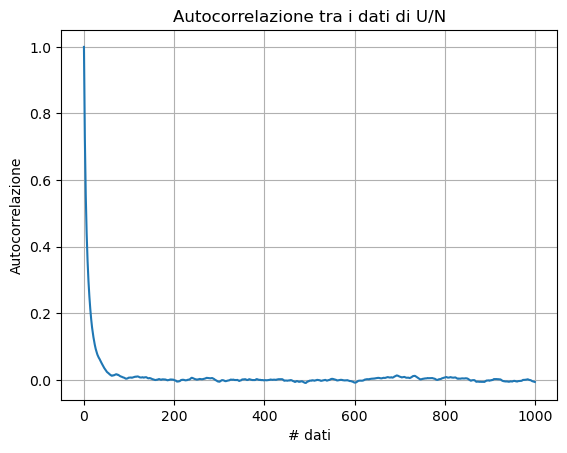

In [2]:
solid_epot = np.loadtxt("risultati/Autocorrelazione/Solid/output_epot.dat", usecols=(1), unpack='true')

solid_autoc = autocorrelation(solid_epot, 1000)

plt.plot(solid_autoc)
plt.title("Autocorrelazione tra i dati di U/N")
plt.xlabel("# dati")
plt.ylabel("Autocorrelazione")
plt.grid(True)
plt.plot()

In [3]:
# RICODARTI CHE DEVI MOSTRARE GLI ERRORI CHE SALGONO!!!!!!!

## Punto 4